In [388]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Домашнее задание №1: визуализация, k-NN регрессия, кросс-валидация.

В этом задании мы рассмотрим задачу прогнозирования количества взятых в аренду велосипедов.

Файл [bike_sharing.csv](https://yadi.sk/d/n8iy_trO3EsUBa) содержит данные о 731 дне работы сервиса по аренде велосипедов. Про каждый день известны:

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius from 0 to 100.
- atemp: Normalized feeling temperature in Celsius from 0 to 100.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**1. (0.25 балла)** Откройте файл bike_sharing.csv, запишите в датафрейм df и выведите первые пять строк датафрейма.

In [389]:
df = pd.read_csv('bike_sharing.csv')
df[:5]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34.4167,36.3625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36.3478,35.3739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,19.6364,18.9405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20.0000,21.2122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,22.6957,22.9270,0.436957,0.186900,82,1518,1600


**2. (1 балл)** Постройте график среднего числа арендованных байков (cnt) по каждому месяцу. Не забудьте подписать оси координат. Убедитесь, что в летние месяцы велосипеды в прокат берут чаще.

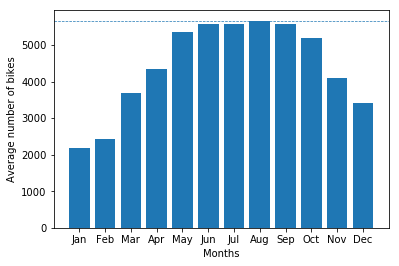

In [390]:
bikesByMonth = []
for i in range(1, 13):
    bikesByMonth.append(sum(df[df.mnth == i].cnt) // len(df[df.mnth == 1]))
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

fig, ax = plt.subplots()
ics = np.arange(12)

ax.set_xticks(ics)
ax.set_xticklabels(months)

ax.set_xlabel('Months')
ax.set_ylabel('Average number of bikes')

ax.bar(ics, bikesByMonth)

ax.axhline(max(bikesByMonth), linestyle='dashed', linewidth=0.7)


** 3. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot) с осями cnt и atemp, где точки — это объекты. Какой логичный вывод можно сделать по этому графику?

Делаем вывод, что скорее всего, существует некоторая зависимость между количеством арендованных байков и температурой. К примеру, на 60 градусов приходятся дни с наибольшей арендой

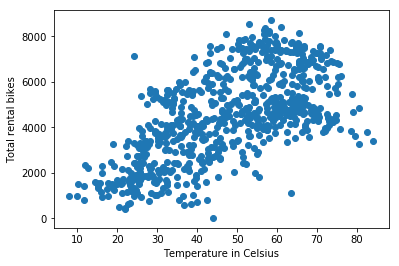

In [391]:
fig, ax = plt.subplots()
ax.set_xlabel('Temperature in Celsius')
ax.set_ylabel('Total rental bikes')
ax.scatter(x=df['atemp'], y=df['cnt'])

**4. (0.5 балла)** Преобразуйте небинарные категориальные признаки с помощью one-hot кодирования. Сделать это можно с помощью функции pd.get_dummies, указав нужные столбцы в параметре columns. Сколько признаков получилось после кодирования? И какой категориальный признак породил больше всего бинарных?

In [392]:
import re
print("Всего признаков до кодирования: " + str(len(df.columns)))

not_include = ['yr', 'holiday', 'workingday', 'instant', 'dteday', 'temp', 'atemp', 'hum', 
              'windspeed', 'casual', 'registered', 'cnt'] # Эти признаки бинарные категориальные или некатегориальные
include_cols = [col_name for col_name in df.columns if col_name not in not_include]
onehot = pd.get_dummies(df, columns=include_cols)

print("Всего признаков после кодирования: " + str(len(onehot.columns)))
attrName = ''
attrMax = 0
for attr in include_cols:
    ptrn = re.compile(attr + '_*')
    l = len([x for x in onehot.columns if ptrn.match(x)])
    print(attr + ' ' + str(l))
    if l > attrMax:
        attrMax = l
        attrName = attr
print("Категориальный признак {0} породил больше всего бинарных ({1} штук)".format(attrName, attrMax))

Всего признаков до кодирования: 16
Всего признаков после кодирования: 38
season 4
mnth 12
weekday 7
weathersit 3
Категориальный признак mnth породил больше всего бинарных (12 штук)


**5. (0.25 балла)** Удалите столбцы instant, dteday, casual и registered. Предположите, почему мы удаляем эти признаки.

In [393]:
d = ['instant', 'dteday', 'casual', 'registered']
df = df.drop(d, axis=1)
df[:5]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,34.4167,36.3625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,36.3478,35.3739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,19.6364,18.9405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,20.0000,21.2122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,22.6957,22.9270,0.436957,0.186900,1600


**6. (0.5 балла)** Далее нашей целевой переменной будет количество арендованных велосипедов (cnt). Поэтому запишите cnt в переменную df_ans и удалите из df. Затем в помощью функции train_test_split из sklearn.model_selection разделите выборку на обучающую и контрольную в отношении 7 к 3, создав переменные X_train, X_test, y_train, y_test.

Замечание 1: установите random_seed, чтобы генератор псевдослучайных чисел работал всегда одинаково.

Замечание 2: если в sklearn.model_selection нет функции train_test_split, обновите scikit-learn.

In [394]:
from sklearn.model_selection import train_test_split
df_ans = df.cnt
df = df.drop('cnt', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, df_ans.values, test_size=0.3, random_state=13)

**7. (1 балл)** Обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке.

In [395]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

clf = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=y_pred)

1102.7872727272727

**8. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot), по одной оси отметив настоящее число аренд велосипедов, а по другой — предсказанное алгоритмом. Дополнительно на этом графике постройте прямую $y = x$. Чему соотстветствует отклонение от этой прямой?

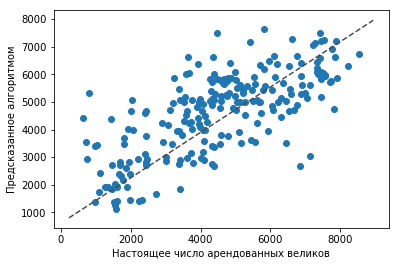

In [396]:
fig, ax = plt.subplots()
ax.set_xlabel('Настоящее число арендованных великов')
ax.set_ylabel('Предсказанное алгоритмом')
ax.scatter(x=y_test, y=y_pred)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

**9. (1 балл)** Отмасштабируйте признаки, чтобы они принимали значения на $[0, 1]$.

Это можно сделать собственноручно с помощью операций pandas.

Иначе — можно использовать MinMaxScaler из sklearn.preprocessing — класс с методами fit и transform. 
Для этого:

* либо соедините X_train и X_test обратно в единый датафрейм, отмасштабируйте и разъедините обратно,
* либо отмасштабируйте df (без ответов) и разделите на обучающую и контрольную выборку, используя тот же random_seed.

На выходе метода transform получится numpy-массив, который нужно будет превратить обратно в датафрейм.

In [397]:
from sklearn.preprocessing import MinMaxScaler
X_train_len = len(X_train)
X_train_test = np.vstack([X_train, X_test])

scaler = MinMaxScaler()
scaler.fit(X_train_test)
X_train_test = scaler.transform(X_train_test)
X_train, X_test = X_train_test[:X_train_len], X_train_test[X_train_len:]

**10. (0.5 балла)** Вновь обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке. Почему качество поменялось?

In [398]:
clf = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=y_pred)

567.1309090909092

**11. (1.25 балла)** Используя класс KFold из sklearn.model_selection установите с помощью кросс-валидации на пяти фолдах, какой параметр weights лучше с точки зрения mean absolute error. 

In [399]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42)

clf_uniform = KNeighborsRegressor(n_neighbors=5, metric='euclidean', weights='uniform')
clf_distance = KNeighborsRegressor(n_neighbors=5, metric='euclidean', weights='distance')

X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

y_pred_uniform = np.zeros(y.shape)
y_pred_distance = np.zeros(y.shape)

for train_index, test_index in kf.split(X, y):
    clf_uniform.fit(X[train_index], y[train_index])
    y_pred_uniform[test_index] = clf_uniform.predict(X[test_index])
    
    clf_distance.fit(X[train_index], y[train_index])
    y_pred_distance[test_index] = clf_distance.predict(X[test_index])

MAE_uniform = mean_absolute_error(y_true=y, y_pred=y_pred_uniform)
MAE_distance = mean_absolute_error(y_true=y, y_pred=y_pred_distance)

print("'Uniform' weights: {0}\n'Distance' weights: {1}".format(MAE_uniform, MAE_distance))

'Uniform' weights: 613.030095759234
'Distance' weights: 586.9970097661612


**12. (2.5 балла)** С помощью GridSearchCV из sklearn.model_selection на пяти фолдах выберите лучшее значение $k$ от 1 до 50. Постройте график MAE на кросс-валидации в зависимости от $k$. 

Замечание: Передать нужную метрику качества для GridSearchCV можно через параметр scoring, но не всё так просто. Из метрики качества нужно сделать «scorer» c помощью функции sklearn.metrics.make_scorer, не забыв указать нужное значение greater_is_better.

In [400]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

k_range = range(1, 51)
param_grid = dict(n_neighbors=k_range) # We will try to choose the optimal number of neighbors for KNN
param_grid['weights'] = ['uniform', 'distance']

clf = KNeighborsRegressor(metric='euclidean') # Make generic KNN here
mscorer = make_scorer(mean_absolute_error, greater_is_better=False) # Make a custom MAE scorer
grid = GridSearchCV(clf, param_grid, cv=5, scoring=mscorer, n_jobs=4)

grid.fit(X, y) # Will take a little time
gridDF = pd.DataFrame(grid.cv_results_) # Print results as Pandas DataFrame
gridDF

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001743,0.002571,-689.400821,0.000000,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",44,-656.761905,-0.000000,...,-717.280822,-0.000000,-752.164384,-0.000000,-736.294521,-0.000000,0.000544,0.000419,61.512713,0.000000
1,0.000711,0.002308,-689.400821,0.000000,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",44,-656.761905,-0.000000,...,-717.280822,-0.000000,-752.164384,-0.000000,-736.294521,-0.000000,0.000072,0.000671,61.512713,0.000000
2,0.003117,0.002099,-617.349521,-343.628658,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",15,-578.833333,-355.325342,...,-661.996575,-334.400855,-711.130137,-323.541026,-623.890411,-336.939316,0.004833,0.000198,68.656143,15.881489
3,0.000719,0.002168,-608.672575,0.000000,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",9,-562.453382,-0.000000,...,-655.561824,-0.000000,-695.634207,-0.000000,-627.861815,-0.000000,0.000021,0.000064,68.688953,0.000000
4,0.000706,0.004412,-608.594163,-412.770974,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",8,-569.276644,-425.099886,...,-639.881279,-412.997151,-677.289954,-379.428490,-628.189498,-418.836467,0.000018,0.004639,52.948755,17.420098
5,0.000691,0.002180,-591.928087,0.000000,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",4,-546.450262,-0.000000,...,-633.911668,-0.000000,-665.566265,-0.000000,-614.725838,-0.000000,0.000037,0.000113,60.568250,0.000000
6,0.000748,0.002205,-609.637141,-455.873304,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",10,-577.030612,-475.665240,...,-628.705479,-457.691026,-673.224315,-415.428632,-633.092466,-463.707692,0.000046,0.000077,47.711760,21.038953
7,0.000724,0.003018,-587.592358,0.000000,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",2,-553.731337,-0.000000,...,-611.015049,-0.000000,-659.452244,-0.000000,-609.919265,-0.000000,0.000049,0.000766,53.517798,0.000000
8,0.000757,0.003690,-613.030096,-488.967917,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",12,-589.178231,-505.757192,...,-625.856164,-485.412991,-682.535616,-468.673162,-619.145205,-485.370256,0.000097,0.001825,44.144749,12.906834
9,0.000702,0.002708,-586.997010,0.000000,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1,-563.694004,-0.000000,...,-607.265525,-0.000000,-657.693256,-0.000000,-591.299555,-0.000000,0.000041,0.000592,47.148110,0.000000


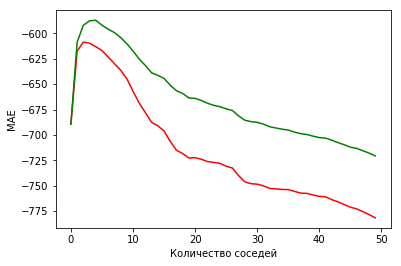

In [401]:
fig, ax = plt.subplots()
ax.set_xlabel('Количество соседей')
ax.set_ylabel('MAE')

weights_uniform_results = gridDF[gridDF.param_weights == 'uniform'].mean_test_score
weights_distance_results = gridDF[gridDF.param_weights == 'distance'].mean_test_score
ax.plot(np.arange(50), weights_uniform_results, 'r')
ax.plot(np.arange(50), weights_distance_results, 'g')

**13. (0.25 балла)** Посчитайте качество итоговой модели на контрольной выборке. 

In [402]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [405]:
knn_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')
X_train, X_test, y_train, y_test = train_test_split(df, df_ans.values, test_size=0.3, random_state=13)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=y_pred)

1067.2425460903523